In [1]:
from pipeline import Solar_pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('./data/Table_dataset.csv')
hyperparams_path = './hyperparams.json'
model_path = './model/'
pred_path = './prediction/'
target_name = 'Thickness'
test_size = 0.3
random_state = 42

SP = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    test_size=test_size, random_state=random_state)

In [3]:
SP.fit()

Model found. Loading the model >> LinearRegression
Time consumed loading/training model :: 0.00 s
No hyperparameters to tune >> LinearRegression
**************************************************


Model found. Loading the model >> Ridge
Time consumed loading/training model :: 0.01 s
BEST PARAMS >> Ridge: OrderedDict([('alpha', 10.0), ('solver', 'saga')])
**************************************************


Model found. Loading the model >> Lasso
Time consumed loading/training model :: 0.01 s
BEST PARAMS >> Lasso: OrderedDict([('alpha', 0.294291468580296), ('selection', 'random')])
**************************************************


Model found. Loading the model >> ElasticNet
Time consumed loading/training model :: 0.01 s
BEST PARAMS >> ElasticNet: OrderedDict([('alpha', 10.0), ('l1_ratio', 0.0), ('selection', 'random')])
**************************************************


Model found. Loading the model >> BayesianRidge
Time consumed loading/training model :: 0.01 s
BEST PARAMS >> B

In [ ]:
SP.display_perf_table(metric='R2', ascending=False)

,R2,RMSE,MSE,MAE,MAPE
MLPRegressor,0.94603,5.69846,32.47249,4.86567,5.77189
AdaBoostRegressor,0.94005,6.00593,36.07121,5.01746,5.42995
CatBoostRegressor,0.91256,7.25349,52.61315,5.06303,5.33658
KNeighborsRegressor,0.90680,7.48855,56.07845,4.83105,4.75203
LGBMRegressor,0.89072,8.10892,65.75462,5.83553,6.12066
GradientBoostingRegressor,0.88312,8.38624,70.32904,5.39827,5.30203
XGBRegressor,0.82855,10.15706,103.16588,6.14751,5.97925
RandomForestRegressor,0.74756,12.32463,151.89658,6.60689,6.21883
SVR,0.63747,14.76959,218.14086,7.57418,7.23095
BayesianRidge,0.51445,17.09277,292.16283,10.38920,11.27090


In [ ]:
SP.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
MLPRegressor,0.94603,5.69846,32.47249,4.86567,5.77189
AdaBoostRegressor,0.94005,6.00593,36.07121,5.01746,5.42995
CatBoostRegressor,0.91256,7.25349,52.61315,5.06303,5.33658
KNeighborsRegressor,0.90680,7.48855,56.07845,4.83105,4.75203
LGBMRegressor,0.89072,8.10892,65.75462,5.83553,6.12066
GradientBoostingRegressor,0.88312,8.38624,70.32904,5.39827,5.30203
XGBRegressor,0.82855,10.15706,103.16588,6.14751,5.97925
RandomForestRegressor,0.74756,12.32463,151.89658,6.60689,6.21883
SVR,0.63747,14.76959,218.14086,7.57418,7.23095
BayesianRidge,0.51445,17.09277,292.16283,10.38920,11.27090


Best Model: MLPRegressor
Best hyperparams: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': [100, 100], 'learning_rate': 'constant', 'solver': 'lbfgs'}
Best performance: R2       0.946033
RMSE     5.698464
MSE     32.472489
MAE      4.865673
MAPE     5.771887
Name: MLPRegressor, dtype: float64


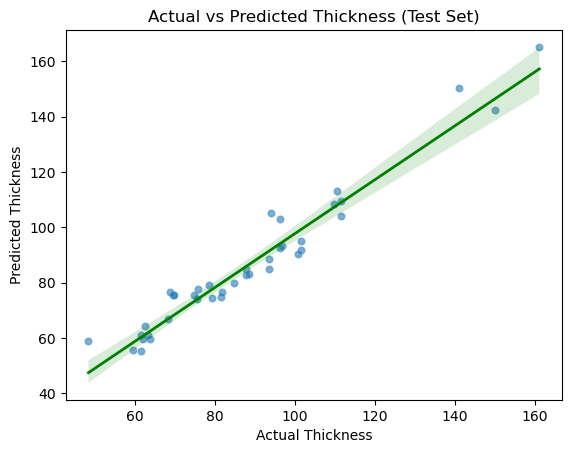

In [ ]:
best_model, y_pred, test_pred = SP.summarize(metric='RMSE')

In [ ]:
print(best_model)

GridSearchCV(cv=5, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.1, 'log-uniform'],
                         'hidden_layer_sizes': [[50], [100], [50, 50],
                                                [100, 100]],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='neg_mean_squared_error')
